## 1. Import Library & Eksplor Dataset dengan Pandas

In [80]:
# Import library awal yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use("seaborn")

In [81]:
# Load dataset
data_januari = pd.read_csv("Volume Pengangkutan Sampah Di Kali Sungai Situ Waduk Bulan Januari Tahun 2021.csv",
                          encoding="latin-1")
data_januari.head()

,bulan,titik_lokasi,kecamatan,wilayah,panjang/luas,satuan_panjang/luas,tanggal,volume_sampah_perhari(m3)
0,1,Kali / Sungai Sentiong - Ruas Dewi Sri,Johar Baru,Jakarta Pusat,464,m,1,4
1,1,Kali / Sungai Sentiong - Ruas Abapon,Johar Baru,Jakarta Pusat,464,m,1,4
2,1,Kali / Sungai Sentiong - JL Tanah Tinggi,Johar Baru,Jakarta Pusat,464,m,1,4
3,1,Kali / Sungai Sentiong Jl.Galur - Pombensin,Johar Baru,Jakarta Pusat,606,m,1,4
4,1,Kali / Sungai Sentiong - Jl. Timah,Johar Baru,Jakarta Pusat,310,m,1,7


In [82]:
# Melihat info dataset (tipe data, total record data, dll)
data_januari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54343 entries, 0 to 54342
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   bulan                      54343 non-null  int64 
 1    titik_lokasi              54343 non-null  object
 2    kecamatan                 54343 non-null  object
 3    wilayah                   54343 non-null  object
 4    panjang/luas              53475 non-null  object
 5   satuan_panjang/luas        32388 non-null  object
 6   tanggal                    54343 non-null  int64 
 7   volume_sampah_perhari(m3)  54343 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [83]:
# Menghapus jarak spasi pada kolom dataset
data_januari.columns = data_januari.columns.str.replace(" ", "")

In [84]:
# Melihat nilai statistik deskriptif dari dataset untuk keseluruhan kolom
data_januari.describe(include="all")

,bulan,titik_lokasi,kecamatan,wilayah,panjang/luas,satuan_panjang/luas,tanggal,volume_sampah_perhari(m3)
count,54343.0,54343,54343,54343,53475,32388,54343.000000,54343
unique,NaN,1747,42,5,442,11,NaN,59
top,NaN,Saluran PHB Asem,Tanjung Priok,Jakarta Barat,1000,m,NaN,-
freq,NaN,62,2914,16430,6512,29884,NaN,15649
mean,1.0,NaN,NaN,NaN,NaN,NaN,16.000000,NaN
std,0.0,NaN,NaN,NaN,NaN,NaN,8.944354,NaN
min,1.0,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,1.0,NaN,NaN,NaN,NaN,NaN,8.000000,NaN
50%,1.0,NaN,NaN,NaN,NaN,NaN,16.000000,NaN
75%,1.0,NaN,NaN,NaN,NaN,NaN,24.000000,NaN


Hasil keluaran diatas menandakan beberapa nilai-nilai dari statistik deskriptif dari kedua jenis data yakni numerik (tipe data int & float) dan kategorik (tipe data object/string) dan tentu saja setiap jenis data memiliki nilai deskriptif yang berbeda. Seperti misalnya jenis data numerik memiliki nilai deskriptif seperti count, mean, std (standard deviasi), maximum, minimum, quartil 1 (25%), quartil 2/median (50%) dan quartil 3 (75%). Sedangkan jenis data kategorik memiliki nilai deskriptif seperti count, unique, top dan freq (frekuensi data).

Sebagai contoh dapat dilihat pada penjelasan dibawah ini:

- Pada kolom titik_lokasi tidak memiliki nilai mean, standard deviasi, min, dll, tetapi memiliki nilai top, unique, freq, dll. Hal tersebut dikarenakan kolom titik_lokasi bersifat kategorik (karena memiliki tipe data string). Maka dari itu kolom titik_lokasi memiliki nilai top yakni PHB PLN, nilai freq adalah 62, dst.

- Sedangkan pada kolom tanggal tidak memiliki nilai top, freq, dll tetapi memiliki nilai mean, standard deviasi, min, max, dll. Hal tersebut dikarenakan kolom tanggal bersifat numerik. Nilai mean pada kolom tanggal adalah 16.0, nilai max adalah 31.0, nilai quartil 3 adalah 24.0, dst.

Berikut adalah kolom-kolom yang bersifat kategorik dan numerik:

- Kategorik: titik_lokasi, kecamatan, wilayah, panjang/luas, satuan_panjang/luas dan volume_sampah_perhari(m3).
- Numerik: bulan dan tanggal.

In [85]:
# Melihat tipe data dari masing-masing kolom yang ada di dalam dataframe
data_januari.dtypes

bulan                         int64
titik_lokasi                 object
kecamatan                    object
wilayah                      object
panjang/luas                 object
satuan_panjang/luas          object
tanggal                       int64
volume_sampah_perhari(m3)    object
dtype: object

In [86]:
# Melihat nama kolom yang ada di dalam dataframe
data_januari.columns

Index(['bulan', 'titik_lokasi', 'kecamatan', 'wilayah', 'panjang/luas',
       'satuan_panjang/luas', 'tanggal', 'volume_sampah_perhari(m3)'],
      dtype='object')

In [87]:
# Melihat jumlah rows dan kolom pada dataframe
data_januari.shape

(54343, 8)

In [88]:
"""
Menghitung nilai dari beberapa kolom (kecamatan, wilayah, satuan_panjang/satuan) 
dari yang sering muncul - tidak sering muncul di dalam dataframe
"""
print(data_januari["kecamatan"].value_counts())
print()

print(data_januari["wilayah"].value_counts())
print()

print(data_januari["satuan_panjang/luas"].value_counts())

Tanjung Priok        2914
Kalideres            2914
Penjaringan          2759
Cilincing            2542
Cengkareng           2480
Grogol Petamburan    2325
Cakung               2263
Kembangan            2232
Tamansari            1953
Pademangan           1891
Kebon Jeruk          1581
Tambora              1550
Kelapa Gading        1488
Palmerah             1395
Koja                 1395
Jatinegara           1364
Duren Sawit          1302
Pulo Gadung          1302
Jagakarsa            1178
Pasar Rebo           1147
Kramat Jati          1116
Makasar               961
Matraman              961
Ciracas               930
Tanah Abang           899
Gambir                899
Pancoran              868
Kebayoran Baru        837
Cilandak              837
Pasar Minggu          837
Kebayoran Lama        806
Setiabudi             775
Tebet                 744
Mampang Prapatan      713
Cipayung              651
Pesanggrahan          620
Sawah Besar           558
Senen                 527
Cempaka Puti

In [89]:
# Mengubah nama kolom satuan_panjang/luas menjadi satuan_panjang
rename_column_data = data_januari.rename(columns={"satuan_panjang/luas":"satuan_panjang"})

rename_column_data.columns

Index(['bulan', 'titik_lokasi', 'kecamatan', 'wilayah', 'panjang/luas',
       'satuan_panjang', 'tanggal', 'volume_sampah_perhari(m3)'],
      dtype='object')

In [90]:
# Memisahkan semua data yang memiliki kecamatan = Tanah Abang
data_tanah_abang = rename_column_data[rename_column_data.kecamatan == "Tanah Abang"]
data_tanah_abang.head(10)

,bulan,titik_lokasi,kecamatan,wilayah,panjang/luas,satuan_panjang,tanggal,volume_sampah_perhari(m3)
88,1,Kali / Sungai BKB Ciliwung Jembatan Jl Jendral...,Tanah Abang,Jakarta Pusat,1500,m,1,4.48
89,1,Kali / Sungai BKB Ciliwung Jembatan Jl.KH Mas ...,Tanah Abang,Jakarta Pusat,1000,m,1,4.48
90,1,kali / Sungai BKB Ciliwung Pintu Air karet,Tanah Abang,Jakarta Pusat,1000,m,1,4.48
91,1,kali / Sungai BKB Ciliwung Petamburan,Tanah Abang,Jakarta Pusat,1500,m,1,4
92,1,kali / Sungai BKB Ciliwung Stasiun Tanah Abang,Tanah Abang,Jakarta Pusat,1000,m,1,0
93,1,Kali / Sungai Cideng BI,Tanah Abang,Jakarta Pusat,1000,m,1,1
94,1,Kali / Sungai Cideng kraton,Tanah Abang,Jakarta Pusat,1000,m,1,2.24
95,1,Kali / Sungai Cideng Kebon Kacang Gedung jaya,Tanah Abang,Jakarta Pusat,1000,m,1,4.48
96,1,Kali / Sungai Cideng DEPAG,Tanah Abang,Jakarta Pusat,1000,m,1,2.24
97,1,Kali / Sungai Gendong Grand Indonesia/Pintu Ai...,Tanah Abang,Jakarta Pusat,1000,m,1,1


In [91]:
# Memisahkan semua data yang memiliki wilayah = Jakarta Timur
data_jaktim = rename_column_data[rename_column_data.wilayah == "Jakarta Timur"]
data_jaktim.head()

,bulan,titik_lokasi,kecamatan,wilayah,panjang/luas,satuan_panjang,tanggal,volume_sampah_perhari(m3)
1366,1,Kali Cipinang Jembatan Radar AURI - Jembatan M...,Ciracas,Jakarta Timur,1800,m,1,-
1367,1,Kali Cipinang Jembatan Mekarsari - Jembatan Tipar,Ciracas,Jakarta Timur,1200,m,1,-
1368,1,Kali Cipinang - Jembatan Mekarsari - Jembatan ...,Ciracas,Jakarta Timur,1000,m,1,-
1369,1,Kali Cipinang Belakang SMA 99 -Jembatan Peti Mati,Ciracas,Jakarta Timur,2000,m,1,-
1370,1,Kali Cipinang Jembatan Peti Mati - Jembatan Pa...,Ciracas,Jakarta Timur,1000,m,1,-


In [92]:
# Memisahkan semua data yang memiliki satuan_panjang = Ha
data_Ha = rename_column_data[rename_column_data.satuan_panjang == "Ha"]
data_Ha.head(10)

,bulan,titik_lokasi,kecamatan,wilayah,panjang/luas,satuan_panjang,tanggal,volume_sampah_perhari(m3)
177,1,PHB Akses Marunda,Cilincing,Jakarta Utara,1,Ha,1,0
234,1,Waduk Kodamar,Kelapa Gading,Jakarta Utara,8,Ha,1,0
346,1,Waduk Sunter Selatan SPBU Shell,Tanjung Priok,Jakarta Utara,10,Ha,1,0
347,1,Waduk Sunter Selatan Pos Polisi,Tanjung Priok,Jakarta Utara,9,Ha,1,0
348,1,Waduk Sunter Selatan SPBU Pertamina,Tanjung Priok,Jakarta Utara,9,Ha,1,0
349,1,Waduk Sunter Utara Bisma,Tanjung Priok,Jakarta Utara,10,Ha,1,3
350,1,Waduk Sunter Utara Stadion BMW,Tanjung Priok,Jakarta Utara,10,Ha,1,3
352,1,Waduk Sunter Utara Daikin,Tanjung Priok,Jakarta Utara,10,Ha,1,3
400,1,Waduk Sunter Timur depan Gor,Tanjung Priok,Jakarta Utara,6.5,Ha,1,0
401,1,Waduk Sunter Timur depan Astra Container,Tanjung Priok,Jakarta Utara,6.5,Ha,1,0


## 2. Data Preprocessing

In [93]:
# Mengecek nilai kosong (NaN) dari masing-masing kolom di dataframe
data_januari.isnull().sum()

bulan                            0
titik_lokasi                     0
kecamatan                        0
wilayah                          0
panjang/luas                   868
satuan_panjang/luas          21955
tanggal                          0
volume_sampah_perhari(m3)        0
dtype: int64

In [94]:
# Mengecek apakah di dalam dataframe terdapat nilai duplikat/tidak
data_januari.duplicated().sum()

0

In [95]:
# Mengubah format penamaan kolom dari yang semula huruf kecil menjadi huruf gabungan (huruf besar & kecil)
data_januari = data_januari.rename(str.title, axis="columns")

In [96]:
# Menghapus karakter yang berada di kolom "Panjang/Luas"
data_januari["Panjang/Luas"] = data_januari["Panjang/Luas"].str.replace(r"\D", "")

In [97]:
# Mengahapus karakter "-" di kolom "Volume_Sampah_Perhari(M3)" dengan nilai NaN
data_januari["Volume_Sampah_Perhari(M3)"] = data_januari["Volume_Sampah_Perhari(M3)"].replace("-", np.nan)

Alasan saya mengganti icon "-" dengan nilai NaN adalah supaya dapat memudahkan ketika dalam mengganti data karena nilai NaN tersebut akan saya isi dengan nilai yang ada di statistik deskriptif yaitu nilai mean.

In [98]:
# Mengubah tipe data di kolom "Panjang/Luas" dari string menjadi float
data_januari[["Panjang/Luas"]] = data_januari[["Panjang/Luas"]].apply(pd.to_numeric)

In [99]:
data_januari["Panjang/Luas"].value_counts()

1000.0    6512
500.0     5735
2000.0    2883
1500.0    2294
800.0     2108
          ... 
1350.0       1
1820.0       1
1360.0       1
2700.0       1
1320.0       1
Name: Panjang/Luas, Length: 412, dtype: int64

In [100]:
# Mengubah tipe data pada kolom "Volume_Sampah_Perhari(M3)" dari string menjadi float
data_januari["Volume_Sampah_Perhari(M3)"] = pd.to_numeric(data_januari["Volume_Sampah_Perhari(M3)"], errors="coerce")

data_januari.tail()

,Bulan,Titik_Lokasi,Kecamatan,Wilayah,Panjang/Luas,Satuan_Panjang/Luas,Tanggal,Volume_Sampah_Perhari(M3)
54338,1,Kali Cakung Drain (Jembatan Tinggi-Perbatasan ...,Cakung,Jakarta Timur,800.0,m,31,NaN
54339,1,PHB Rawa Teratai,Cakung,Jakarta Timur,700.0,m,31,NaN
54340,1,PHB Rawa Gelam III,Cakung,Jakarta Timur,1000.0,m,31,NaN
54341,1,PHB Metropos KIP,Cakung,Jakarta Timur,1000.0,m,31,NaN
54342,1,PHB Warung Jengkol,Cakung,Jakarta Timur,400.0,m,31,2.0


In [101]:
"""
Mengubah tipe data pada dari beberapa kolom (kolom "Kecamatan", "Wilayah", dan "Satuan_Panjang/Luas") 
menjadi int (semula adalah string)

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

data_januari["Kecamatan"] = labelencoder.fit_transform(data_januari["Kecamatan"])
data_januari["Wilayah"] = labelencoder.fit_transform(data_januari["Wilayah"])
data_januari["Satuan_Panjang/Luas"] = labelencoder.fit_transform(data_januari["Satuan_Panjang/Luas"])

data_januari.tail()
"""

'\nMengubah tipe data pada dari beberapa kolom (kolom "Kecamatan", "Wilayah", dan "Satuan_Panjang/Luas") \nmenjadi int (semula adalah string)\n\nfrom sklearn.preprocessing import LabelEncoder\n\nlabelencoder = LabelEncoder()\n\ndata_januari["Kecamatan"] = labelencoder.fit_transform(data_januari["Kecamatan"])\ndata_januari["Wilayah"] = labelencoder.fit_transform(data_januari["Wilayah"])\ndata_januari["Satuan_Panjang/Luas"] = labelencoder.fit_transform(data_januari["Satuan_Panjang/Luas"])\n\ndata_januari.tail()\n'

In [102]:
# Mengganti nilai NaN yang ada disetiap kolom di data_januari dengan nilai mean
mean = data_januari.mean()
data_januari = data_januari.replace(np.nan, mean)

data_januari.isnull().sum()

Bulan                            0
Titik_Lokasi                     0
Kecamatan                        0
Wilayah                          0
Panjang/Luas                     0
Satuan_Panjang/Luas          21955
Tanggal                          0
Volume_Sampah_Perhari(M3)        0
dtype: int64

Karena pada kolom "Satuan_Panjang/Luas" terdapat 21955 nilai data yang kosong maka saya akan menghapus kolom "Satuan_Panjang/Luas". Selain karena memiliki nilai NaN yang sangat banyak, kolom "Satuan_Panjang/Luas" sudah tidak dibutuhkan dalam mencari prediksi terkait tingkat pengangkutan volume sampah.

Selain kolom tersebut saya juga akan menghapus kolom "Bulan" karena sudah jelas dari data ini hanya berisi volume sampah yang berhasil diangkut di Bulan Januari tahun 2021.

In [103]:
# Menghapus kolom yang sudah tidak dibutuhkan yaitu kolom "Satuan_Panjang/Luas" dan kolom "Bulan"
data_januari = data_januari.drop(["Satuan_Panjang/Luas", "Bulan"], axis=1)

In [104]:
# Mengecek nilai outliers untuk kolom "Panjang/Luas" dengan nilai quartil dan IQR
Q1 = data_januari["Panjang/Luas"].quantile(0.25)
Q3 = data_januari["Panjang/Luas"].quantile(0.75)

# Menghitung interquartile range maka rumusnya adalah quartil 3 (75%) - quartil 1 (25%)
IQR = Q3 - Q1

# Melihat ukuran (baris dan kolom) sebelum data yang outliers dibuang
print("Ukuran Data dari Kolom Panjang/Luas Sebelum Nilai Outliers Dibuang: ", data_januari.shape)

# Menghapus nilai outlier dari kolom "Panjang/Luas"
data_januari = data_januari[~((data_januari["Panjang/Luas"] < (Q1 - 1.5 * IQR)) | 
                              (data_januari["Panjang/Luas"] > (Q3 + 1.5 * IQR)))]

# Melihat ukuran (baris dan kolom) setelah data outliers dibuang dari kolom "Panjang/Luas"
print("Ukuran Data dari Kolom Panjang/Luas Setelah Nilai Outliers Dibuang: ", data_januari.shape)

Ukuran Data dari Kolom Panjang/Luas Sebelum Nilai Outliers Dibuang:  (54343, 6)
Ukuran Data dari Kolom Panjang/Luas Setelah Nilai Outliers Dibuang:  (43803, 6)


Berdasarkan hasil output diatas terdapat 10.540 data outlier dari kolom "Panjang/Luas" dan jika dihapus akan mengkhawatirkan distribusi data di kolom Panjang/Luas tidak balanced/tidak seimbang.

In [105]:
"""
# Mengecek nilai outliers untuk kolom "Panjang/Luas" dengan nilai quartil dan IQR
Q1 = data_januari["Volume_Sampah_Perhari(M3)"].quantile(0.25)
Q3 = data_januari["Volume_Sampah_Perhari(M3)"].quantile(0.75)

# Menghitung interquartile range maka rumusnya adalah quartil 3 (75%) - quartil 1 (25%)
IQR = Q3 - Q1

# Melihat ukuran (baris dan kolom) sebelum data yang outliers dibuang
print("Ukuran Data dari Kolom Volume_Sampah_Perhari(M3) Sebelum Nilai Outliers Dibuang: ", data_januari.shape)

# Menghapus nilai outlier dari kolom "Panjang/Luas"
data_januari = data_januari[~((data_januari["Volume_Sampah_Perhari(M3)"] < (Q1 - 1.5 * IQR)) | 
                              (data_januari["Volume_Sampah_Perhari(M3)"] > (Q3 + 1.5 * IQR)))]

# Melihat ukuran (baris dan kolom) setelah data outliers dibuang dari kolom "Panjang/Luas"
print("Ukuran Data dari Kolom Volume_Sampah_Perhari(M3) Setelah Nilai Outliers Dibuang: ", data_januari.shape)
"""

'\n# Mengecek nilai outliers untuk kolom "Panjang/Luas" dengan nilai quartil dan IQR\nQ1 = data_januari["Volume_Sampah_Perhari(M3)"].quantile(0.25)\nQ3 = data_januari["Volume_Sampah_Perhari(M3)"].quantile(0.75)\n\n# Menghitung interquartile range maka rumusnya adalah quartil 3 (75%) - quartil 1 (25%)\nIQR = Q3 - Q1\n\n# Melihat ukuran (baris dan kolom) sebelum data yang outliers dibuang\nprint("Ukuran Data dari Kolom Volume_Sampah_Perhari(M3) Sebelum Nilai Outliers Dibuang: ", data_januari.shape)\n\n# Menghapus nilai outlier dari kolom "Panjang/Luas"\ndata_januari = data_januari[~((data_januari["Volume_Sampah_Perhari(M3)"] < (Q1 - 1.5 * IQR)) | \n                              (data_januari["Volume_Sampah_Perhari(M3)"] > (Q3 + 1.5 * IQR)))]\n\n# Melihat ukuran (baris dan kolom) setelah data outliers dibuang dari kolom "Panjang/Luas"\nprint("Ukuran Data dari Kolom Volume_Sampah_Perhari(M3) Setelah Nilai Outliers Dibuang: ", data_januari.shape)\n'

In [106]:
# Mengubah tipe data pada kolom "Panjang/Luas" dan "Volume_Sampah_Perhari(M3)" dari float menjadi integer
data_januari["Panjang/Luas"] = data_januari["Panjang/Luas"].astype(int)
data_januari["Volume_Sampah_Perhari(M3)"] = data_januari["Volume_Sampah_Perhari(M3)"].astype(int)

data_januari.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43803 entries, 0 to 54342
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Titik_Lokasi               43803 non-null  object
 1   Kecamatan                  43803 non-null  object
 2   Wilayah                    43803 non-null  object
 3   Panjang/Luas               43803 non-null  int32 
 4   Tanggal                    43803 non-null  int64 
 5   Volume_Sampah_Perhari(M3)  43803 non-null  int32 
dtypes: int32(2), int64(1), object(3)
memory usage: 2.0+ MB


## 3. Data Visualisasi serta Analisa per Grafik

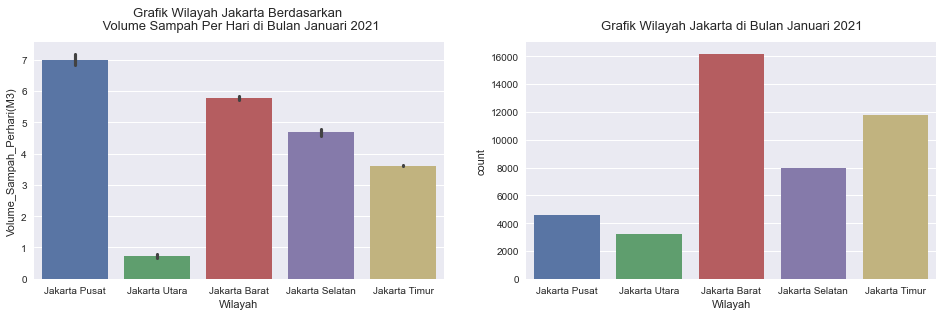

In [107]:
# Melihat perbandingan antar wilayah di Provinsi DKI Jakarta (berdasarkan volume sampah per hari)
plt.figure(figsize=(25, 20))

plt.subplot(4, 3, 1)
sns.barplot(x="Wilayah", y="Volume_Sampah_Perhari(M3)", data=data_januari)
plt.title("Grafik Wilayah Jakarta Berdasarkan \n Volume Sampah Per Hari di Bulan Januari 2021", 
          fontsize=13, pad=13)

plt.subplot(4, 3, 2)
sns.countplot(x="Wilayah", data=data_januari)
plt.title("Grafik Wilayah Jakarta di Bulan Januari 2021", fontsize=13, pad=13)
plt.show()

Berdasarkan grafik diagram diatas maka dapat diambil beberapa kesimpulan diantaranya:

1. Wilayah Jakarta Pusat memiliki volume sampah yang paling tinggi diantara wilayah yang lain sedangkan Wilayah Jakarta Utara memiliki volume sampah yang sangat sedikit. Jika diurutkan dalam hal volume sampah yang berhasil diangkut maka akan terjadi susunan seperti dibawah ini:
- Jakarta Pusat.
- Jakarta Barat.
- Jakarta Selatan.
- Jakarta Timur.
- Jakarta Utara.

2. Grafik kedua merupakan grafik yang memperlihatkan perbandingan Wilayah yang ada di Provinsi DKI Jakarta yang dihitung per Kecamatan tanpa ada keterkaitan dalam pengangkutan sampah per harinya. Wilayah Jakarta Barat memiliki nilai yang sangat tinggi yakni mencapai 16.000 sedangkan Wilayah Jakarta Utara memiliki nilai perhitungan yang sangat kecil yakni hanya mencapai kurang lebih 3.000 saja. Jika diurutkan maka hasilnya adalah sebagai berikut:
- Jakarta Barat.
- Jakarta Timur.
- Jakarta Selatan.
- Jakarta Pusat.
- Jakarta Utara.

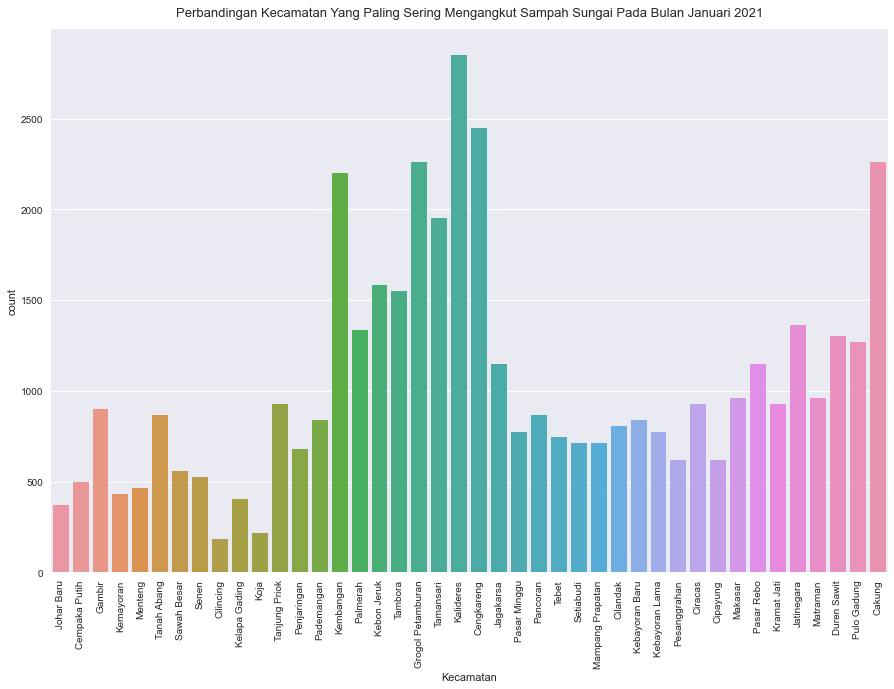

In [108]:
# Melihat perbandingan antar kecamatan dalam hal pengangkutan sampah yang ada di Provinsi DKI Jakarta
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)

sns.countplot(x="Kecamatan", data=data_januari)
plt.title("Perbandingan Kecamatan Yang Paling Sering Mengangkut Sampah Sungai Pada Bulan Januari 2021", fontsize=13, pad=13)
plt.show()

Berdasarkan grafik diatas terkait perbandingan jumlah perhitungan total antar Kecamatan yang didasari oleh kolom Titik_Lokasi dalam menghasilkan/mengumpulkan volume sampah per harinya di Provinsi DKI Jakarta, maka dapat diambil kesimpulan sebagai berikut:

1. Kecamatan yang mempunyai nilai tertinggi adalah Kecamatan Kalideres yang memiliki nilai lebih dari 2.500. Jumlah nilai tersebut tidak ada keterkaitannya dengan volume sampah per harinya melainkan didasarkan atas Titik_Lokasi dari sampah-sampah yang berhasil diangkut per harinya.
2. Kecamatan seperti Kembangan, Cengkareng, Kebon Jeruk, Grogol dan Palmerah yang saya kira memiliki nilai tertinggi ternyata masih kalah jauh dari Kecamatan Kalideres (Hanya Kecamatan Cengkareng dan Grogol yang memiliki perbandingan nilai yang sangat kecil dari Kecamatan Kalideres).
3. Kecamatan yang memiliki titik lokasi terendah dalam hal pengangkutan sampah di Provinsi DKI Jakarta adalah Kecamatan Cilincing yang berada di Wilayah Jakarta Utara yang memiliki titik lokasi pengangkutan hanya 186 saja. Kalah tipis dari Kecamatan Koja yang berada di Wilayah yang sama (Jakarta Utara).

Harus diingat bahwa perhitungan dalam memilih Kecamatan tertinggi sampai terendah didasarkan bukan dari volume sampah yang berhasil dingkut per harinya melainkan dari pengumpulan sampah di suatu titik lokasi tertentu saja seperti, kali, saluran penghubung (PHB), waduk, dll.

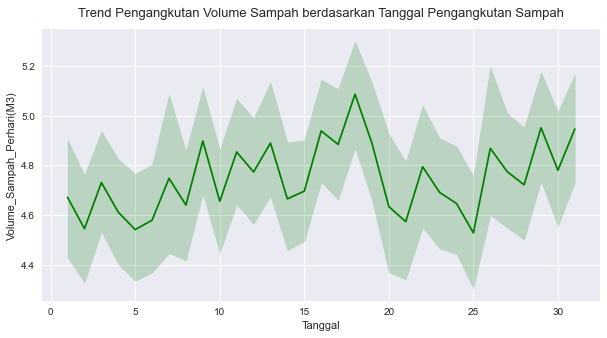

In [109]:
# Melihat trend dalam pengangkutan sampah per harinya berdasarkan tanggal pengangkutan
plt.figure(figsize=(10, 5))
    
sns.lineplot(x="Tanggal", y="Volume_Sampah_Perhari(M3)", color="green", data=data_januari)
plt.title("Trend Pengangkutan Volume Sampah berdasarkan Tanggal Pengangkutan Sampah", fontsize=13, pad=13)
plt.show()

Dari grafik garis (Line plot) diatas menunjukkan intensitas pengangkutan sampah yang dilakukan oleh Dinas Lingkungan Hidup Provinsi DKI Jakarta di setiap hari pada bulan Januari tahun 2021. Hasilnya adalah cenderung menunjukkan terjadinya trend kenaikan volume sampah di setiap harinya dan puncaknya terjadi di tanggal 18 Januari 2021. Namun pada tanggal 25 Januari terjadi penurunan trend dalam mengangkut sampah di berbagai titik lokasi yang telah ditentukan. Tetapi walaupun begitu penurunan trend data ini tidak terlalu mengkhawatirkan sebab setelah tanggal 25 Januari, tepatnya pada tanggal 26 Januari, terjadi kenaikan trend yang sangat signifikan walaupun di hari esoknya (27 Januari) juga terjadi penurunan trend kembali dalam mengangkut sampah di beberapa titik lokasi yang telah ditentukan (Walaupun tidak sedrastis tanggal 25).

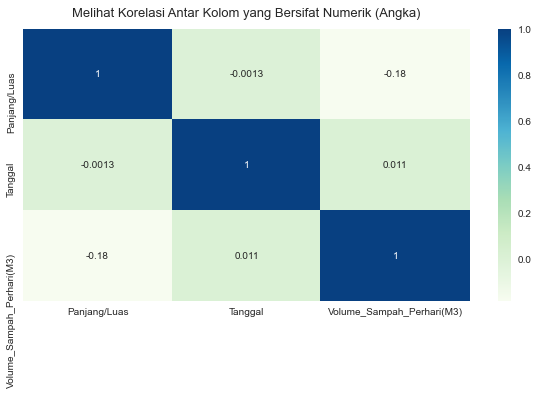

In [110]:
# Melihat korelasi antar kolom yang memiliki bersifat numerik
plt.figure(figsize=(10, 5))

korelasi_data = sns.heatmap(data_januari.corr(), cmap="GnBu", annot=True)
korelasi_data.set_title("Melihat Korelasi Antar Kolom yang Bersifat Numerik (Angka)", fontdict={"fontsize":13}, pad=13);

Grafik diatas dinamakan sebagai grafik heatmap atau grafik peta panas dengan menunjukkan nilai korelasi antar masing-masing kolom yang bersifat numerik sedangkan kategorik tidak. Cara membaca grafik ini yaitu membaca dari sumbu y ke sumbu x atau sebaliknya dengan memfokuskan/memperhatikan nilai yang ada di box persegi sebagai penanda nilai korelasinya. Contohnya adalah sebagai berikut:

1. Variabel Panjang/Luas yang ada di sumbu y memiliki nilai korelasi 1 dengan variabel yang sama (Panjang/Luas) yang berada di sumbu x. Sedangkan variabel Panjang/Luas yang ada di sumbu y memiliki nilai korelasi -0.0013 dengan variabel Tanggal yang ada di sumbu x. Hal tersebut menandakan tidak memiliki hubungan timbal-balik tetapi sedikit memiliki hubungan timbal-balik. Sedangkan variabel Panjang/Luas yang ada di sumbu y dengan variabel Volume_Sampah_Perhari(M3) sama sekali tidak memiliki hubungan timbal-balik karena nilai yang dihasilkan adalah -0.18.
2. Variabel Volume_Sampah_Perhari(M3) yang ada di sumbu y memiliki nilai korelasi = 0.0011 dengan variabel Tanggal yang ada di sumbu x. Sama seperti variabel Panjang/Luas dengan variabel Tanggal, di dalam kasus ini berarti variabel Volume_Sampah_Perhari(M3) sedikit memiliki hubungan timbal balik walaupun penilaian dominannya cenderung tidak memiliki hubungan timbal-balik.

Jadi intinya setiap kolom-kolom yang ada di sumbu y (yang berada di sisi kiri) dibaca/diperhatikan setiap nilainya dengan kolom-kolom yang berada di sumbu x (yang berada di bawah). Untuk memudahkan dalam membedakan apakah nilai korelasinya bagus/tidak dapat dilihat dari indikator warna yang di sebelah paling kanan dari grafik heatmap. Semakin bagus nilai korelasinya maka warnanya menjadi biru tua tetapi semakin buruk/kecil nilai korelasinya maka nilai warna pada box persegi di nilai tersebut menjadi warna putih.

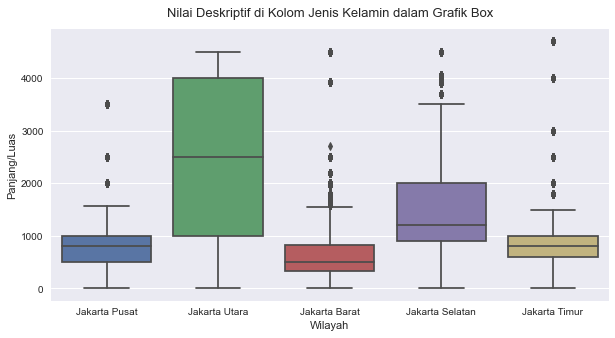

In [111]:
# Melihat nilai deskriptif di kolom "Wilayah" berdasarkan kolom "Panjang/Luas" melalui grafik box
plt.figure(figsize=(10, 5))

sns.boxplot(x="Wilayah", y="Panjang/Luas", data=data_januari)
plt.title("Nilai Deskriptif di Kolom Jenis Kelamin dalam Grafik Box", fontsize=13, pad=13)
plt.show()

Grafik box plot merupakan sebuah bentuk grafik yang berfungsi untuk memperlihatkan nilai statistik deskriptif seperti nilai maximum, minimum, quartil 1 - 3 dan juga nilai-nilai outlier per datanya. Maka dari berdasarkan hasil dari grafik boc diatas saya dapat mengambil kesimpulan dan dapat menentukan nilai-nilai deskriptif di kolom Wilayah diantaranya adalah sebagai berikut:

1. Wilayah Jakarta Pusat:
- Nilai maksimal dari Wilayah Jakarta Pusat jika dilihat berdasarkan Panjang/Luas volume sampah yang berhasil diangkut berada di nilai 1500. Selain itu di Wilayah Jakarta Pusat masih terdapat beberapa nilai outlier walaupun tidak sebanyak saat belum dilakukan cleansing nilai outlier di kolom Panjang/Luas.
- Nilai quartil 3 = 1000.
- Nilai quartil 2 = 800.
- Nilai quartil 1 = 500.
- Nilai minimum pada Wilayah Jakarta Pusat di grafik box diatas adalah 0.
- Sedangkan nilai interquartile range = 500 yang didapatkan dari pengurangan antara nilai quartil 3 dengan quartil 1 (IQR = Q3 - Q1).

2. Wilayah Jakarta Utara:
- Nilai maksimal dari Wilayah Jakarta Utara yaitu 1500.
- Nilai quartil 3 = 4000.
- Nilai quartil 2 = 2500.
- Nilai quartil 1 = 1000.
- Nilai minimum pada Wilayah Jakarta Utara adalah 0.
- Sedangkan nilai interquartile range (IQR) = 3000.

3. Wilayah Jakarta Barat:
- Nilai maksimal dari Wilayah Jakarta Barat adalah 1500. Selain itu di Wilayah Jakarta Barat masih terdapat beberapa nilai outlier yang cukup banyak. Tetepi walaupun begitu nilai outlier yang masih ada tidak sebanyak ketika saat belum dilakukan proses penghapusan nilai outlier di kolom Panjang/Luas.
- Nilai quartil 3 = 800.
- Nilai quartil 2 = 400.
- Nilai quartil 1 = 300.
- Nilai minimum pada Wilayah Jakarta Barat = 0.
- Sedangkan nilai interquartile range pada Wilayah Jakarta Barat adalah 700 (dari hasil pengurangan quartil 3 dengan quartil 1).

4. Wilayah Jakarta Selatan:
- Nilai maksimal dari Wilayah Jakarta Selatan berada di nilai 3500. Selain itu di Wilayah Jakarta Selatan masih terdapat beberapa nilai outlier walaupun begitu tidak sebanyak ketika saat belum dilakukan proses penghapusan nilai outlier di kolom Panjang/Luas.
- Nilai quartil 3 = 2000.
- Nilai quartil 2 = 1200.
- Nilai quartil 1 = 900.
- Nilai minimum pada Wilayah Jakarta Barat = 0.
- Sedangkan nilai interquartile range pada Wilayah Jakarta Selatan = 1.100.

5. Wilayah Jakarta Timur:
- Nilai maksimal dari Wilayah Jakarta Timur = 1400. Selain itu di Wilayah Jakarta Timur masih terdapat beberapa nilai outlier walaupun begitu tidak sebanyak ketika saat belum dilakukan proses penghapusan nilai outlier di kolom Panjang/Luas.
- Nilai quartil 3 = 1000.
- Nilai quartil 2 = 800.
- Nilai quartil 1 = 600.
- Nilai minimum pada Wilayah Jakarta Barat = 0.
- Sedangkan nilai IQR (Interquartile Range) di box Wilayah Jakarta Timur adalah 400.

<AxesSubplot:title={'center':'Melihat Persebaran Data Antar 2 Kolom'}, xlabel='Tanggal', ylabel='Volume_Sampah_Perhari(M3)'>

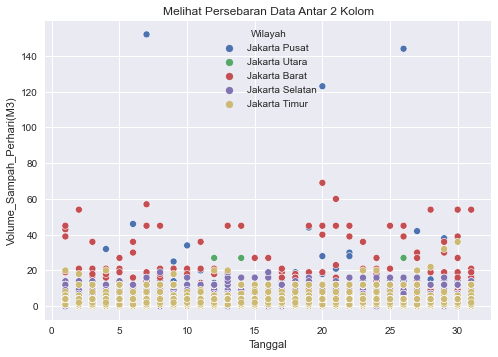

In [112]:
# Melihat pola hubungan antara 2 kolom mennggunakan scatter plot
plt.title("Melihat Persebaran Data Antar 2 Kolom")
sns.scatterplot(x="Tanggal", y="Volume_Sampah_Perhari(M3)", hue="Wilayah", data=data_januari)

In [113]:
"""
# Melihat presentase masing-masing wilayah Provinsi DKI Jakarta berdasarkan volume sampah disetiap harinya
data_pie = data_januari.groupby("Wilayah")["Volume_Sampah_Perhari(M3)"].sum().reset_index()
plt.figure(figsize=(10, 8))
#colors = ["blue", "red", "green", "yellow", "purple"]

plt.pie(data_pie["Volume_Sampah_Perhari(M3)"], labels = data_pie["Wilayah"], autopct = "%1.2f%%")
plt.title("Melihat Presentase Antar Wilayah Berdasarkan Volume Sampah Dari Sungai Provinsi DKI Jakarta", pad=13, fontsize=13)
plt.show()
"""

'\n# Melihat presentase masing-masing wilayah Provinsi DKI Jakarta berdasarkan volume sampah disetiap harinya\ndata_pie = data_januari.groupby("Wilayah")["Volume_Sampah_Perhari(M3)"].sum().reset_index()\nplt.figure(figsize=(10, 8))\n#colors = ["blue", "red", "green", "yellow", "purple"]\n\nplt.pie(data_pie["Volume_Sampah_Perhari(M3)"], labels = data_pie["Wilayah"], autopct = "%1.2f%%")\nplt.title("Melihat Presentase Antar Wilayah Berdasarkan Volume Sampah Dari Sungai Provinsi DKI Jakarta", pad=13, fontsize=13)\nplt.show()\n'